# K Means (Traditional and Spark)

In [ ]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Part 1: Introduction

Let us say we have a set $X$ of $n$ data points in the $d$-dimensional space (i.e., $d$ features). Given the number of clusters $k$ and the set of $k$ centroids $C$, we now proceed to define various distance metrics and the corresponding cost functions that they minimize in clustering.

## 1.1 Euclidean Distance

Given two points $A$ and $B$ in $d$ dimensional space such that $A = [a_1, a_2, \cdots, a_d]$ and $B = [b_1, b_2, \cdots, b_d]$, the Euclidean distance between $A$ and $B$ is defined as

\begin{equation}
||A-B||=\sqrt{\sum_{i=1}^d (a_i-b_i)^2}
\end{equation}

The corresponding cost function $\phi$ that is minimized when we assign points to clusters using the Euclidean distance metric is given by

\begin{equation}
\phi = \sum_{x\in X} \min_{c\in C}||x-c||^2
\end{equation}


## 1.2 Manhattan distance

The Manhattan distance between $A$ and $B$ is defined as

\begin{equation}
|A-B| = \sum_{i=1}^d|a_i-b_i|
\end{equation}

The corresponding cost function $\psi$ that is minimized when we assign points to clusters using the Manhattan distance metric is given by

\begin{equation}
\psi =\sum_{x\in X}\min_{c\in C}|x-c|
\end{equation}

## 1.3 Iterative K-Means Algorithm 

Algorithm 1: Iterative K-Means Algorithm

1. Select $k$ points as initial centroids of the $k$ clusters.

2. for iterations 1 to MAX_ITER do
  * for each point $p$ in the dataset do
      * Assign point $p$ to the cluster with the closest centroid
  * end for
  * for each cluster $c$ do
    * Recompute the centroid of $c$ as the mean of all the data points assigned to $c$
  * end for
3. end for

---------------------------------------------------------

## 1.4 Data and Setup

We use the dataset in kmeans.zip.

The zip has 3 files:

    1. data.txt contains the dataset which has 4601 rows and 58 columns. Each row is a document represented as a 58 dimensional vector of features. Each component in the vector represents the importance of a word in the document.

    2. c1.txt contains k initial cluster centroids. These centroids were chosen by selecting k = 10 random points from the input data.

    3. c2.txt contains initial cluster centroids which are as far apart as possible using Euclidean distance (i.e., k-means++).

Set number of iterations MAX_ITER=25 and number of clusters $k=10$ for all the following experiments. **Your program should ensure that the correct number of iterations are run.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_A5/

/content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_A5


In [ ]:
from utils import fetch_and_cache

In [ ]:
data='data.txt'
print(data, "======================")
with open(data, "r") as f:
    for i in range(20):
        print(i, "\t", repr(f.readline()))

data.txt ======================
0 	 '0 0.64 0.64 0 0.32 0 0 0 0 0 0 0.64 0 0 0 0.32 0 1.29 1.93 0 0.96 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.778 0 0 3.756 61 278 1\n'
1 	 '0.21 0.28 0.5 0 0.14 0.28 0.21 0.07 0 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0 1.59 0 0.43 0.43 0 0 0 0 0 0 0 0 0 0 0 0 0.07 0 0 0 0 0 0 0 0 0 0 0 0 0.132 0 0.372 0.18 0.048 5.114 101 1028 1\n'
2 	 '0.06 0 0.71 0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0 1.16 0.06 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.06 0 0 0.12 0 0.06 0.06 0 0 0.01 0.143 0 0.276 0.184 0.01 9.821 485 2259 1\n'
3 	 '0 0 0 0 0.63 0 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0 0 0.31 0 0 3.18 0 0.31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.137 0 0.137 0 0 3.537 40 191 1\n'
4 	 '0 0 0 0 0.63 0 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0 0 0.31 0 0 3.18 0 0.31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.135 0 0.135 0 0 3.537 40 191 1\n'
5 	 '0 0 0 0 1.85 0 0 1.85 0 0 0

In [ ]:
c1='c1.txt'
print(c1, "======================")
with open(c1, "r") as f:
    for i in range(10):
        print(i, "\t", repr(f.readline()))

c1.txt ======================
0 	 '0 0.64 0.64 0 0.32 0 0 0 0 0 0 0.64 0 0 0 0.32 0 1.29 1.93 0 0.96 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.778 0 0 3.756 61 278 1\n'
1 	 '0.21 0.28 0.5 0 0.14 0.28 0.21 0.07 0 0.94 0.21 0.79 0.65 0.21 0.14 0.14 0.07 0.28 3.47 0 1.59 0 0.43 0.43 0 0 0 0 0 0 0 0 0 0 0 0 0.07 0 0 0 0 0 0 0 0 0 0 0 0 0.132 0 0.372 0.18 0.048 5.114 101 1028 1\n'
2 	 '0.06 0 0.71 0 1.23 0.19 0.19 0.12 0.64 0.25 0.38 0.45 0.12 0 1.75 0.06 0.06 1.03 1.36 0.32 0.51 0 1.16 0.06 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.06 0 0 0.12 0 0.06 0.06 0 0 0.01 0.143 0 0.276 0.184 0.01 9.821 485 2259 1\n'
3 	 '0 0 0 0 0.63 0 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0 0 0.31 0 0 3.18 0 0.31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.137 0 0.137 0 0 3.537 40 191 1\n'
4 	 '0 0 0 0 0.63 0 0.31 0.63 0.31 0.63 0.31 0.31 0.31 0 0 0.31 0 0 3.18 0 0.31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.135 0 0.135 0 0 3.537 40 191 1\n'
5 	 '0 0 0 0 1.85 0 0 1.85 0 0 0 0

In [ ]:
c2='c2.txt'
print(c2, "======================")
with open(c2, "r") as f:
    for i in range(10):
        print(i, "\t", repr(f.readline()))

c2.txt ======================
0 	 '0 0.64 0.64 0 0.32 0 0 0 0 0 0 0.64 0 0 0 0.32 0 1.29 1.93 0 0.96 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.778 0 0 3.756 61 278 1\n'
1 	 '0.19 0 0.38 0 0 0.19 0 0 0 0 0.19 0.19 0 0 0 0.38 0 0.19 1.14 0 0.38 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.01 0.01 0 0 0 0.003 2.383 21 15841 1\n'
2 	 '0 0 0 0.04 0 0 0 0 0 0 0 0 0 0 0 0.02 0 0 0.02 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1.024 9.752 0.003 1.542 1.785 1.998 239.571 9989 10062 1\n'
3 	 '0.29 0.04 0.04 0 0.14 0.04 0 0.29 0.29 0.94 0.14 0.04 0.14 0 0.19 0.04 0.39 0.19 1.6 0.04 0.79 9.53 0.69 0.47 0 0 0 0 0 0 0 0 0 0 0 0.04 0 0 0.04 0 0 0 0 0 0.19 0 0 0 1.117 0.053 0 0.356 0.09 0.011 12.332 1171 9163 1\n'
4 	 '0.01 0.01 0.07 0 0.05 0 0 0.01 0.03 0.13 0.05 0 0 0.05 0 0 0.01 0.07 0.01 0 0.01 0 0 0 0 0 0 0 0 0 0 0 0.07 0 0 0.13 0 0 0 0.01 0.46 0 0 0.03 0 0.8 0.01 0.07 0.05 0.301 0.131 0.002 0.09 0.002 2.577 82 5395 0\n'
5 	 '0.2 0.81 0.61 0 0 0 0 0 0

In [ ]:
data = pd.read_csv('data.txt', sep=' ', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
columns_list = list(data.columns)

In [ ]:
X = data.values
X

array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 6.100e+01, 2.780e+02,
        1.000e+00],
       [2.100e-01, 2.800e-01, 5.000e-01, ..., 1.010e+02, 1.028e+03,
        1.000e+00],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 4.850e+02, 2.259e+03,
        1.000e+00],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 6.000e+00, 1.180e+02,
        0.000e+00],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 5.000e+00, 7.800e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 5.000e+00, 4.000e+01,
        0.000e+00]])

In [ ]:
X.dtype

dtype('float64')

In [ ]:
c1 = pd.read_csv('c1.txt', sep=' ', header=None)
c1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0,0,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0.00,0,0,0,0.07,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0.00,0,0,0,0.00,0,0,0.06,0,0,0.12,0.00,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0,0,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0,0,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0,0,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0,0,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0.00,0.054,0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0,0,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0.00,0.206,0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0,0.00,0.15,0,0,0,0,0,0,0,0,0.15,0,0,0,0.00,0,0,0.00,0,0,0.30,0.00,0.00,0.00,0,0,0.00,0.271,0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0,0.19,0.00,0,0,0,0,0,0,0,0,0.00,0,0,0,0.00,0,0,0.00,0,0,0.00,0.06,0.00,0.00,0,0,0.04,0.030,0,0.244,0.081,0.000,1.729,43,749,1


In [ ]:
c1.shape

(10, 58)

In [ ]:
XC1 = c1.values
XC1

array([[0.000e+00, 6.400e-01, 6.400e-01, 0.000e+00, 3.200e-01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.400e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 3.200e-01, 0.000e+00, 1.290e+00,
        1.930e+00, 0.000e+00, 9.600e-01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 7.780e-01, 0.000e+00, 0.000e+00,
        3.756e+00, 6.100e+01, 2.780e+02, 1.000e+00],
       [2.100e-01, 2.800e-01, 5.000e-01, 0.000e+00, 1.400e-01, 2.800e-01,
        2.100e-01, 7.000e-02, 0.000e+00, 9.400e-01, 2.100e-01, 7.900e-01,
        6.500e-01, 2.100e-01, 1.400e-01, 1.400e-01, 7.000e-02, 2.800e-01,
        3.470e+00, 0.000e+00, 1.590e+00, 0.000e+00, 4.300e-

In [ ]:
c2 = pd.read_csv('c2.txt', sep=' ', header=None)
c2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.19,0.00,0.38,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.19,0.19,0.00,0.00,0.00,0.38,0.00,0.19,1.14,0.00,0.38,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.010,0.010,0.000,0.000,0.000,0.003,2.383,21,15841,1
2,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,1.024,9.752,0.003,1.542,1.785,1.998,239.571,9989,10062,1
3,0.29,0.04,0.04,0.00,0.14,0.04,0.00,0.29,0.29,0.94,0.14,0.04,0.14,0.00,0.19,0.04,0.39,0.19,1.60,0.04,0.79,9.53,0.69,0.47,0.00,0,0.00,0,0.00,0,0,0,0.00,0,0,0.04,0.00,0,0.04,0.00,0.00,0.00,0,0.00,0.19,0.00,0.00,0.00,1.117,0.053,0.000,0.356,0.090,0.011,12.332,1171,9163,1
4,0.01,0.01,0.07,0.00,0.05,0.00,0.00,0.01,0.03,0.13,0.05,0.00,0.00,0.05,0.00,0.00,0.01,0.07,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0,0.00,0,0.00,0,0,0,0.07,0,0,0.13,0.00,0,0.00,0.01,0.46,0.00,0,0.03,0.00,0.80,0.01,0.07,0.050,0.301,0.131,0.002,0.090,0.002,2.577,82,5395,0
5,0.20,0.81,0.61,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.40,0.00,0.00,0.00,0.20,0.00,0.00,0.20,0.00,0.20,0.00,0.00,0.40,0.00,0,0.00,0,0.00,0,0,0,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.831,0.338,0.030,1102.500,2204,2205,1
6,0.07,0.00,0.15,0.00,0.09,0.05,0.00,0.03,0.05,0.05,0.00,0.41,0.03,0.00,0.00,0.01,0.09,0.13,0.03,0.01,0.07,0.00,0.01,0.00,0.00,0,0.03,0,0.01,0,0,0,1.21,0,0,0.07,0.95,0,0.01,0.11,0.13,0.01,0,0.00,0.00,0.39,0.03,0.51,0.042,0.173,0.002,0.008,0.005,0.002,2.145,71,2954,0
7,0.33,0.00,1.65,0.00,0.99,0.00,0.33,0.00,0.66,1.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.99,0.66,0.00,0.00,0.00,0.33,0,0.00,0,0.00,0,0,0,0.00,0,0,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.859,0.101,0.000,337.250,1146,1349,1
8,0.00,0.00,0.46,0.00,0.00,0.00,0.00,0.15,0.00,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.46,0.93,0.00,0.00,0.00,0.46,0.00,0.00,0,0.00,0,0.00,0,0,0,0.00,0,0,0.15,0.00,0,0.00,0.93,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.071,0.071,0.000,0.095,0.023,0.000,62.750,1505,2761,1
9,0.50,0.25,0.42,0.00,0.08,0.23,0.02,0.35,0.35,0.69,0.21,0.90,0.50,0.92,0.02,0.33,0.42,0.02,3.05,0.00,1.43,0.00,0.94,0.46,0.00,0,0.00,0,0.00,0,0,0,0.00,0,0,0.00,0.00,0,0.00,0.02,0.00,0.00,0,0.00,0.02,0.00,0.02,0.00,0.000,0.069,0.000,0.325,0.523,0.124,6.723,445,4128,1


In [ ]:
XC2 = c2.values
XC2

array([[0.00000e+00, 6.40000e-01, 6.40000e-01, 0.00000e+00, 3.20000e-01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 6.40000e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.20000e-01, 0.00000e+00, 1.29000e+00, 1.93000e+00, 0.00000e+00,
        9.60000e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.78000e-01, 0.00000e+00, 0.00000e+00, 3.75600e+00,
        6.10000e+01, 2.78000e+02, 1.00000e+00],
       [1.90000e-01, 0.00000e+00, 3.80000e-01, 0.00000e+00, 0.00000e+00,
        1.90000e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
   

In [ ]:
c2.shape

(10, 58)

# Part 2: Exploring initialization strategies with Euclidean distance

In this part, we implement the traditional k-means (small-scale version) using the Euclidean distance.

[623660345.306411, 509862908.29754514, 485480681.8720081, 463997011.6850127, 460969266.57299656, 460537847.9827678, 460313099.6535452, 460003523.8894072, 459570539.317735, 459021103.3422909, 458490656.19198084, 457944232.5879742, 457558005.1986769, 457290136.35230196, 457050555.05956274, 456892235.61535484, 456703630.7370337, 456404203.0189748, 456177800.5419932, 455986871.02734584, 455729268.3551453, 455313045.099043, 454742041.34961903, 454232362.7268496, 453801049.2977102]
          cost1         cost2
0  6.236603e+08  4.387478e+08
1  5.098629e+08  2.498039e+08
2  4.854807e+08  1.944948e+08
3  4.639970e+08  1.698048e+08
4  4.609693e+08  1.562957e+08


Text(0.5, 1.0, 'Euclidean Case')

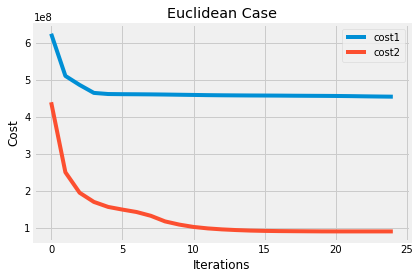

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min
# from sklearn.metrics import pairwise_distances_argmin_min
max_iter = 25
k = 10

def makeClusters(centroid):
  cluster = []
  
  dist_to_centroid = pairwise_distances_argmin_min(X, centroid, metric = 'euclidean')
  cluster = dist_to_centroid[0]
  min_dist = dist_to_centroid[1]
  return cluster, min_dist

def computecentroid(centroid):
  clusters, cost_internal = makeClusters(centroid)
  data_ = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)
  centroid = data_.groupby(['cluster']).mean()
  cost = np.sum(np.square(cost_internal))
  return centroid.values, cost

def k_means_clustering(centroid, data):
  cost_1 = []
  for i in range(max_iter):
    centroid, cost = computecentroid(centroid)
    cost_1.append(cost)
  return cost_1


cost_c1 = k_means_clustering(XC1, X)
cost_c2 = k_means_clustering(XC2, X)
print(cost_c1)
thisdict = {
  'cost1': cost_c1,
  'cost2': cost_c2
}
df = pd.DataFrame(thisdict)
print(df.head())
df.plot(kind = 'line')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Euclidean Case')

Looking at the cost after 10 iterations, we see that random initialization of k-means for c2.txt is better than initialization using c2.txt. With more iterations, cost should become minimum as clusters are being redefined and getting better in terms of homogenity. Cost is the difference among data points in one cluster which should become as low as possible with more iterations. Here, c1 has centroids which do not form very homogenous clusters with increasing iterations whereas initialized centroids in c2 is better initialization which yields homogenous clusters after 10 iteration. Overall, cost is higher than manhattan cost because Euclidean distance measures distance by taking average of squared distance between data points and centroids which aggrevates the discrepancy if two points are close on most variables, but more discrepant on one of them. 


# Part 3: Exploring initialization strategies with Manhattan distance



[550117.142, 464510.3014565931, 470930.305803299, 483811.42656914797, 489213.15150003595, 487720.67438450526, 483721.2691801094, 475297.9252671315, 475053.5375291349, 457195.3543737824, 447393.6666564983, 450801.4156210177, 451164.50595889846, 451826.6997443293, 451505.22523604194, 452441.7120134146, 452998.8592295166, 450646.1355620944, 450419.97011343535, 449009.5903718848, 446771.28354173066, 445474.6737235715, 441548.7412636093, 442505.73507082183, 442234.2840128921]
           cost1         cost2
0  550117.142000  1.433739e+06
1  464510.301457  1.084489e+06
2  470930.305803  9.734317e+05
3  483811.426569  8.959346e+05
4  489213.151500  8.651283e+05


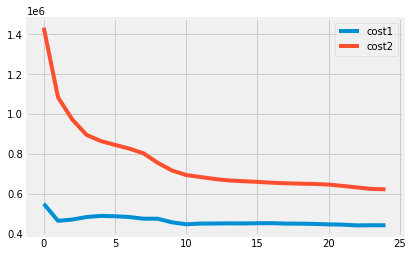

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin_min
max_iter = 25
k = 10

def makeClusters(centroid):
  cluster = []
  
  dist_to_centroid = pairwise_distances_argmin_min(X, centroid, metric = 'manhattan')
  cluster = dist_to_centroid[0]
  min_dist = dist_to_centroid[1]
  return cluster, min_dist

def computecentroid(centroid):
  clusters, cost_internal = makeClusters(centroid)
  data_ = pd.concat([data, pd.DataFrame(clusters, columns=['cluster'])], axis=1)
  centroid = data_.groupby(['cluster']).mean()
  cost = np.sum(np.absolute(cost_internal))
  return centroid.values, cost

def k_means_clustering(centroid, data):
  cost_1 = []
  for i in range(max_iter):
    centroid, cost = computecentroid(centroid)
    cost_1.append(cost)
  return cost_1


cost_c1 = k_means_clustering(XC1, X)
cost_c2 = k_means_clustering(XC2, X)
print(cost_c1)
thisdict = {
  'cost1': cost_c1,
  'cost2': cost_c2
}
df = pd.DataFrame(thisdict)
print(df.head())
df.plot(kind = 'line')

Initialization in c1 is better than initialization in c2. Cost should be minimum with greater iterations which we see in the case of c1 here. Manhattan distance takes absolute of differences between centroids and data points which is robust to outliers. Lower cost estimation for c1 shows that the centroids are well defined and produce clusters containing data points closest to each other. Here, the trend is opposite to that in Euclidean case which could be due to some outliers in initialization of c1 in euclidean case. Moreover, it is also possible that the initialized centroids in c1 produced clusters with data points close to most data points but had some alien data points whose effect got exaggerated in euclidean distance computation. This made the performance of Euclidean k-means with c1.txt initialized centroids poorer than c2. 

# Part 4: K-Means using MapReduce in Spark

In this part, we will implement k-means using MapReduce in Spark when the data is stored in multiple machines. We will implement the following steps.

1. Setup Spark environment.

2. Use `sc.textFile()` to load data (data.txt) and both initializations (c1.txt and c2.txt) separately. 

3. Collect centroids of c1 and c2 for each Mapper since they are small.

4. Use `Map` to assign each data point in each Mapper to the nearest centroid. The cost of each data point can be added using `Map` immediately after the assignment.

5. Use `Reduce` to recompute new centroids that should be collected (`.collect()`) again.

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt-get update
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
cd /content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_A5/

/content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_A5


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext as sc
import pandas as pd

# create the Spark Session
spark = SparkSession.builder.getOrCreate()

# create the Spark Context
sc = spark.sparkContext

In [ ]:
datafile = sc.textFile("/content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_A5/data.txt")

In [ ]:
c1file = sc.textFile("/content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_A5/c1.txt")

In [ ]:
c2file = sc.textFile("/content/drive/MyDrive/TCSS_551_BigDataAnalytics/TCSS551_A5/c2.txt")

In [ ]:
def show(x): 
    print(x)

In [ ]:
import re

# Load the data
data_values = datafile.map(lambda line: np.array([float(x) for x in re.split(' +', line)]))

# Load the initial centroids c1
c1_values = np.array(c1file.map(lambda line: np.array([float(x) for x in re.split(' +', line)])).collect())

# Load the initial centroids c2
c2_values = np.array(c2file.map(lambda line: np.array([float(x) for x in re.split(' +', line)])).collect())

In [ ]:
def closest(point, centroid):
  point = np.array(point).reshape(-1,1).T
  dist_to_centroid = pairwise_distances_argmin_min(point, centroid, metric = 'euclidean')
  cluster = dist_to_centroid[0][0]
  return cluster

In [ ]:
def compute_cost(point, centroid):
  point = np.array(point).reshape(-1,1).T
  dist_to_centroid = pairwise_distances_argmin_min(point, centroid, metric = 'euclidean')
  cost = dist_to_centroid[1][0]**2
  return cost

In [ ]:
costs1 = []
costs2 = []
for i in range(max_iter):
  print("Iteration: " + str(len(costs1)))
  cost1 = (data_values.map(lambda point: (compute_cost(point, c1_values))))
  #print(cost1.take(5))
  cost2 = (data_values.map(lambda point: (compute_cost(point, c2_values))))
  total1 = cost1.reduce(lambda c_1, c_2: c_1+c_2)
  total2 = cost2.reduce(lambda c_1, c_2: c_1+c_2)
  print('1', total1)
  print('2', total2)
  costs1.append(total1)
  costs2.append(total2)
  

  centers1 = data_values.map(lambda point: (closest(point, c1_values), point))
  temp_tuple1 = (0,0)
  agg1 = centers1.aggregateByKey(temp_tuple1, lambda a, b: (a[0]+b, a[1]+1),lambda a,b: (a[0] + b[0], a[1] + b[1]))
  newC1 = agg1.mapValues(lambda v: v[0]/v[1]).collect()
  #stats1 = centers1.reduceByKey(lambda p1, p2: (p1[0] + p2[0], p1[1] + p2[1]))
  centers2 = data_values.map(lambda point: (closest(point, c2_values), point))
  #stats2 = centers2.reduceByKey(lambda p1, p2: (p1[0] + p2[0], p1[1] + p2[1]))
  temp_tuple2 = (0,0)
  agg2 = centers2.aggregateByKey(temp_tuple2, lambda a, b: (a[0]+b, a[1]+1),lambda a,b: (a[0] + b[0], a[1] + b[1]))
  newC2 = agg2.mapValues(lambda v: v[0]/v[1]).collect()
  #newC1 = stats1.map(lambda st: (st[0], st[1][0] / st[1][1])).collect()
  #newC2 = stats2.map(lambda st: (st[0], st[1][0] / st[1][1])).collect()


  # Convert centroids to right data structure
  new_centroids1 = [0] * k
  for c in newC1:
    #print(c)
    new_centroids1[c[0]] = c[1]
  centroids1 = np.array(new_centroids1)
  new_centroids2 = [0] * k
  for c in newC2:
    new_centroids2[c[0]] = c[1]
  centroids2 = np.array(new_centroids2)

  #print(newC1)
  c1_values = centroids1
  c2_values = centroids2

  print(c1_values.shape)

Iteration: 0
1 623660345.3064115
2 438747790.02791744
(10, 58)
Iteration: 1
1 509862908.29754543
2 249803933.62600276
(10, 58)
Iteration: 2
1 485480681.87200844
2 194494814.40631264
(10, 58)
Iteration: 3
1 463997011.68501306
2 169804841.45154336
(10, 58)
Iteration: 4
1 460969266.57299685
2 156295748.806276
(10, 58)
Iteration: 5
1 460537847.98276836
2 149094208.1089661
(10, 58)
Iteration: 6
1 460313099.65354466
2 142508531.61961538
(10, 58)
Iteration: 7
1 460003523.8894082
2 132303869.4065299
(10, 58)
Iteration: 8
1 459570539.31773514
2 117170969.83719087
(10, 58)
Iteration: 9
1 459021103.34229094
2 108547377.17857009
(10, 58)
Iteration: 10
1 458490656.1919811
2 102237203.31799607
(10, 58)
Iteration: 11
1 457944232.58797514
2 98278015.74975674
(10, 58)
Iteration: 12
1 457558005.19867724
2 95630226.12177414
(10, 58)
Iteration: 13
1 457290136.35230196
2 93793314.05119304
(10, 58)
Iteration: 14
1 457050555.0595628
2 92377131.96821074
(10, 58)
Iteration: 15
1 456892235.6153559
2 91541606.25

In [ ]:
print(costs1)

[PythonRDD[1000] at RDD at PythonRDD.scala:53, PythonRDD[1001] at RDD at PythonRDD.scala:53, PythonRDD[1002] at RDD at PythonRDD.scala:53, PythonRDD[1003] at RDD at PythonRDD.scala:53, PythonRDD[1004] at RDD at PythonRDD.scala:53, PythonRDD[1010] at RDD at PythonRDD.scala:53, PythonRDD[1011] at RDD at PythonRDD.scala:53, PythonRDD[1012] at RDD at PythonRDD.scala:53, PythonRDD[1013] at RDD at PythonRDD.scala:53, PythonRDD[1014] at RDD at PythonRDD.scala:53, PythonRDD[1015] at RDD at PythonRDD.scala:53, PythonRDD[1016] at RDD at PythonRDD.scala:53, PythonRDD[1017] at RDD at PythonRDD.scala:53, PythonRDD[1018] at RDD at PythonRDD.scala:53, PythonRDD[1019] at RDD at PythonRDD.scala:53, PythonRDD[1020] at RDD at PythonRDD.scala:53, PythonRDD[1021] at RDD at PythonRDD.scala:53, PythonRDD[1022] at RDD at PythonRDD.scala:53, PythonRDD[1023] at RDD at PythonRDD.scala:53, PythonRDD[1024] at RDD at PythonRDD.scala:53, PythonRDD[1025] at RDD at PythonRDD.scala:53, PythonRDD[1026] at RDD at PythonR

          cost1         cost2
0  6.236603e+08  4.387478e+08
1  5.098629e+08  2.498039e+08
2  4.854807e+08  1.944948e+08
3  4.639970e+08  1.698048e+08
4  4.609693e+08  1.562957e+08


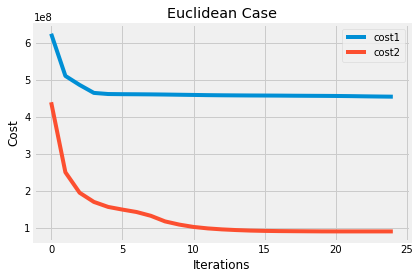

In [ ]:
thisdict1 = {
  'cost1': costs1,
  'cost2': costs2
}
df1 = pd.DataFrame(thisdict1)
print(df1.head())
df1.plot(kind = 'line')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Euclidean Case')
plt.grid(True)
plt.show()